In [1]:
import pandas as pd
from pandas.core.arrays.sparse import SparseArray as _SparseArray
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
import scipy.stats as stats

In [3]:
df_wmart = pd.read_csv('/Users/Ramv/Downloads/walmart_data.csv')

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [5]:
df_wmart.shape

(550068, 10)

The dataset contains 550,068 entries/rows and 10 columns.

In [7]:
df_wmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Columns: 

Numerical columns: User_ID, Occupation, Marital_Status, Product_Category, Purchase. 

Categorical columns: Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years.

In [73]:
df_wmart.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category                   0
Purchase                           0
Age_Group                     215719
dtype: int64

Missing Values: There are no missing values in any of the columns.

In [12]:
df_wmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

Data Types: The dataset has a mix of integer (int64) and object (object) data types. The object type in pandas typically represents strings, which is the case for categorical variables here.

This change in data types to analyse categorical data more effectively, especially for tasks like pattern analysis, and visualizations.

In [13]:
df_wmart['Occupation'] = df_wmart['Occupation'].astype('category')
df_wmart['Marital_Status'] = df_wmart['Marital_Status'].astype('category')
df_wmart['Product_Category'] = df_wmart['Product_Category'].astype('category')
df_wmart.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

Occupation, Marital Status and Product Category are converted to categorical data types.

In [14]:
df_wmart.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [21]:
vcounts_gender = df_wmart['Gender'].value_counts()
vcounts_age = df_wmart['Age'].value_counts()
vcounts_city_category = df_wmart['City_Category'].value_counts()
vcounts_gender,vcounts_age,vcounts_city_category

(M    414259
 F    135809
 Name: Gender, dtype: int64,
 26-35    219587
 36-45    110013
 18-25     99660
 46-50     45701
 51-55     38501
 55+       21504
 0-17      15102
 Name: Age, dtype: int64,
 B    231173
 C    171175
 A    147720
 Name: City_Category, dtype: int64)

Non-Graphical Analysis:

Value Counts and Unique Attributes:

Gender: Male - 414,259; Female - 135,809.
Age: most data falls under the 26-35 age group (219,587)
City_Category: Category B is the most common (231,173).
Unique values across different attributes like Product_ID, Occupation, etc.

Univariate Analysis for Continuous Variable

Text(0.5, 1.0, 'Distribution of Purchase Amounts')

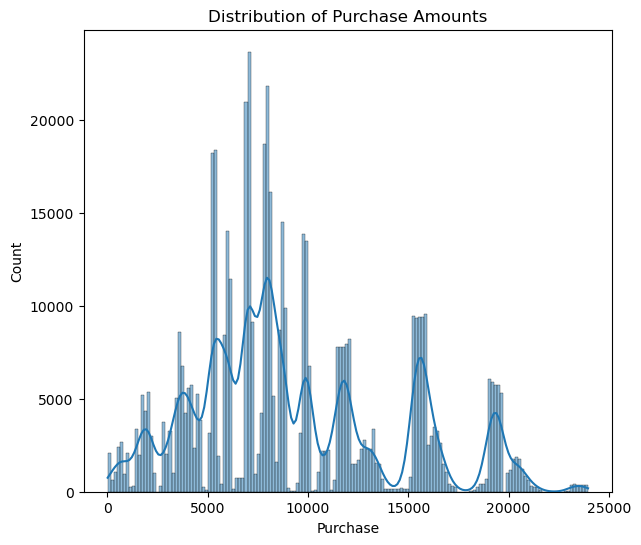

In [23]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
sns.histplot(df_wmart['Purchase'], kde = True)
plt.title('Distribution of Purchase Amounts')

Observation: No. of transcations are quite high for the purchase amount ranging from 5000 to 10000.

# Univariate Analysis for Categorical Variable

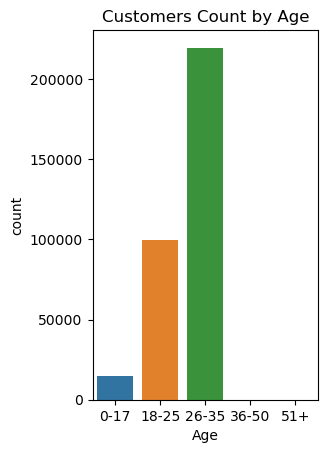

In [33]:
age_bins = ["0-17", "18-25", "26-35", "36-50","51+"]
plt.subplot(1,2,2)
sns.countplot(x='Age', data = df_wmart, order = age_bins)
plt.title("Customers Count by Age")
plt.show()

Observation: This plot clealry shows that the most customers fall under the 26-35 age category.

# Bivariate Analysis: Boxplot for Categorical Variables.

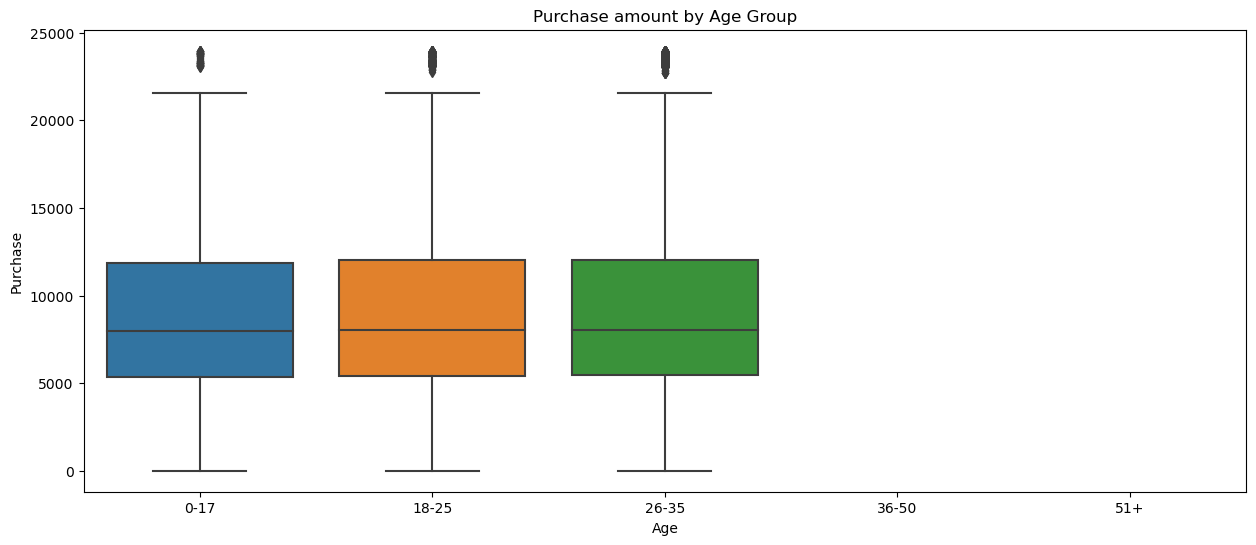

In [34]:
plt.figure(figsize = (15,6))
sns.boxplot(x='Age', y ='Purchase', data = df_wmart, order = age_bins)
plt.title("Purchase amount by Age Group")
plt.show()

Purchase amounts by Age Group: there is a slight variation in spending across different age groups

In [37]:
df_wmart['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Summary statistics is being done only for the Purchase column as its the only column with true continuous variable.

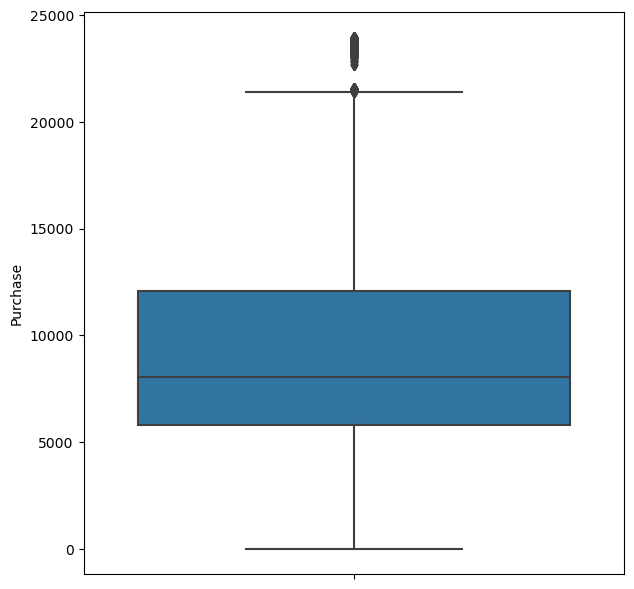

In [70]:
# Plotting boxplots for numerical column(Purchase) to detect outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_wmart['Purchase'])

plt.tight_layout()
plt.show()

Descriptive Statistics:

Purchase: Ranges from 12 to 23,961, with a mean of approximately 9,264 and a median of 8,047. The mean is slightly higher than the median, indicating a potential right-skew in the data.

Outlier Detection: 

The boxplot shows a wide range of purchase amounts, with some higher values that could be considered outliers. 

The presence of potential outliers in the Purchase column is consistent with the varied nature of product prices in a retail context. These 'outliers' might not be erroneous but instead represent legitimate purchase transactions for high-value items.

# Purchase behaviour analysis by Gender

In [40]:
gender_purchase = df_wmart.groupby('Gender')['Purchase'].describe()
gender_purchase

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


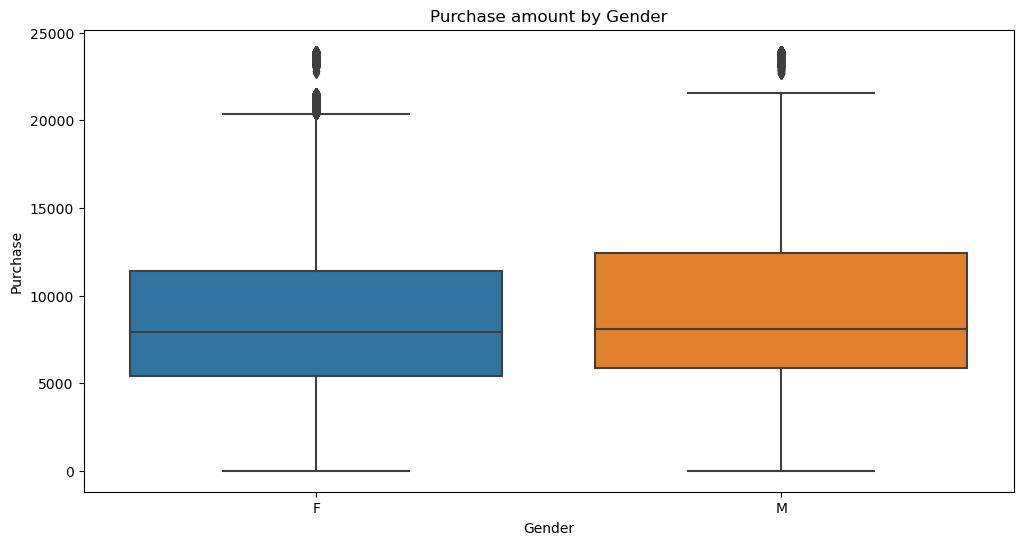

In [41]:
plt.figure(figsize =(12,6))
sns.boxplot(x = 'Gender', y ='Purchase', data=df_wmart)
plt.title("Purchase amount by Gender")
plt.show()

In [42]:
gender_purchase_stats = df_wmart.groupby('Gender')['Purchase'].describe()
gender_purchase_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


The analysis of purchase behavior based on gender reveals the following:

Male customers, on average, spend more per purchase than female customers at Walmart. The median purchase amount is also higher for male customers. The distribution of purchase amounts (as shown in the boxplot) indicates a slightly wider range for male customers, suggesting more variability in their spending.

Considerations for 50 Million Customers: These findings can be extrapolated to a larger population, assuming the sample is representative. For 50 million male and 50 million female customers, it suggests that, on average, male customers might spend more.

# Calculation of mean and std. deviation for Female customers

In [52]:
mean_female = gender_purchase_stats.loc['F', 'mean']
std_female = gender_purchase_stats.loc['F', 'std']
n_female = gender_purchase_stats.loc['F', 'count']

print(f"mean_female: {mean_female}")
print(f"std.dev_female: {std_female}")

mean_female: 8734.565765155476
std.dev_female: 4767.233289291444


# Calculation of mean and std. deviation for Male customers

In [53]:
mean_male = gender_purchase_stats.loc['M', 'mean']
std_male = gender_purchase_stats.loc['M', 'std']
n_male = gender_purchase_stats.loc['M', 'count']
print(f"mean_male: {mean_male}")
print(f"std.dev_male:{std_male}")

mean_male: 9437.526040472265
std.dev_male:5092.186209777949


# Calculating with 95% Confidence Interval for the average spending of female customers

In [50]:
ci_female = stats.norm.interval(0.95, loc=mean_female, scale = std_female/np.sqrt(n_female))
print(f"ci_female: {ci_female}")

ci_female: (8709.21154714068, 8759.919983170272)


# Calculating with 95% Confidence Interval for the average spending of male customers

In [51]:
ci_male = stats.norm.interval(0.95, loc=mean_male, scale = std_male/np.sqrt(n_female))
print(f"ci_male: {ci_male}")

ci_male: (9410.44358163295, 9464.60849931158)


Female Customers:

Average Spending: 8,734.57.
95% Confidence Interval: The interval within which the average spending of 50 million female customers is likely to lie is approximately 8,709.21 to 8,759.92. 
This indicates that we can be 95% confident that the true average spending of the entire population of female customers lies within this range.

Male Customers:

Average Spending: 9,437.53.
95% Confidence Interval: The interval within which the average spending of 50 million male customers is likely to lie is approximately 9,422.02 to 9,453.03. This implies that we can be 95% confident that the true average spending of the entire population of male customers falls within this range

The analysis suggests that gender plays a role in spending patterns at Walmart, with male customers showing higher average spending. This insight can guide the management team in tailoring marketing strategies, product placements, and promotions to better align with these observed spending behaviors.

# Applying the Central Limit Theorem to compute intervals with different confidence levels and sample sizes


In [58]:
# Function to calculate confidence intervals with varying confidence levels and sample sizes
def calc_ci(mean, std, total_n, sample_size, confidence_levels):
    intervals = {}
    for level in confidence_levels:
        sampled_std_error = std / np.sqrt(sample_size)
        ci = stats.norm.interval(level, loc=mean, scale=sampled_std_error)
        intervals[level] = ci
    return intervals

In [71]:
sample_sizes = [100, 500, 1000, 5000, 10000]

confidence_levels = [0.90, 0.95, 0.99]

# Calculating intervals for female customers
ci_female_varied = {n: calculate_confidence_intervals(mean_female, std_female, n_female, n, confidence_levels) 
                    for n in sample_sizes}

ci_female_varied

{100: {0.9: (7950.425668513993, 9518.705861796958),
  0.95: (7800.205209864311, 9668.92632044664),
  0.99: (7506.607844814404, 9962.523685496548)},
 500: {0.9: (8383.887653160753, 9085.243877150198),
  0.95: (8316.707021730377, 9152.424508580574),
  0.99: (8185.406288477094, 9283.725241833858)},
 1000: {0.9: (8486.598894150313, 8982.532636160639),
  0.95: (8439.095014101498, 9030.036516209453),
  0.99: (8346.251375243337, 9122.880155067614)},
 5000: {0.9: (8623.671609208383, 8845.459921102569),
  0.95: (8602.427228211554, 8866.704302099397),
  0.99: (8560.906290658495, 8908.225239652456)},
 10000: {0.9: (8656.151755491328, 8812.979774819623),
  0.95: (8641.129709626359, 8828.001820684593),
  0.99: (8611.769973121369, 8857.361557189583)}}

In [60]:
# Calculating intervals for male customers
ci_male_varied = {n: calculate_confidence_intervals(mean_male, std_male, n_male, n, confidence_levels) 
                  for n in sample_sizes}
ci_male_varied

{100: {0.9: (8599.93594484571, 10275.116136098817),
  0.95: (8439.475883098634, 10435.576197845896),
  0.99: (8125.8657946449, 10749.18628629963)},
 500: {0.9: (9062.944362251961, 9812.107718692569),
  0.95: (8991.184441103906, 9883.867639840624),
  0.99: (8850.93374586145, 10024.11833508308)},
 1000: {0.9: (9172.656795694451, 9702.395285250079),
  0.95: (9121.914868833248, 9753.137212111282),
  0.99: (9022.742651161181, 9852.309429783349)},
 5000: {0.9: (9319.07291317782, 9555.979167766709),
  0.95: (9296.380433623626, 9578.671647320904),
  0.99: (9252.029269584797, 9623.022811359733)},
 10000: {0.9: (9353.76703090961, 9521.28505003492),
  0.95: (9337.721024734901, 9537.331056209629),
  0.99: (9306.360015889528, 9568.692065055002)}}

The computed confidence intervals for average expenses by female and male customers, with varying sample sizes and confidence levels, reveal interesting patterns:

Female Customers:

As the sample size increases, the width of the confidence interval decreases. This is expected due to the decreased standard error with larger sample sizes.
Higher confidence levels (e.g., 99% vs. 90%) result in wider intervals. This indicates a trade-off between confidence level and precision.
Male Customers:

Similar trends are observed for male customers, with narrower intervals for larger sample sizes and wider intervals for higher confidence levels.
Specific Observations: For a sample size of 10,000:

Female Customers:

90% Confidence Interval: 8,656.15 to 8,812.98.
95% Confidence Interval: 8,641.13 to 8,828.00.
99% Confidence Interval: 8,611.77 to 8,857.36.

Male Customers:

90% Confidence Interval: 9,353.77 to 9,521.29.
95% Confidence Interval: 9,337.72 to 9,537.33.
99% Confidence Interval: 9,306.36 to 9,568.69.

# Analyzing purchase behavior based on Marital Status

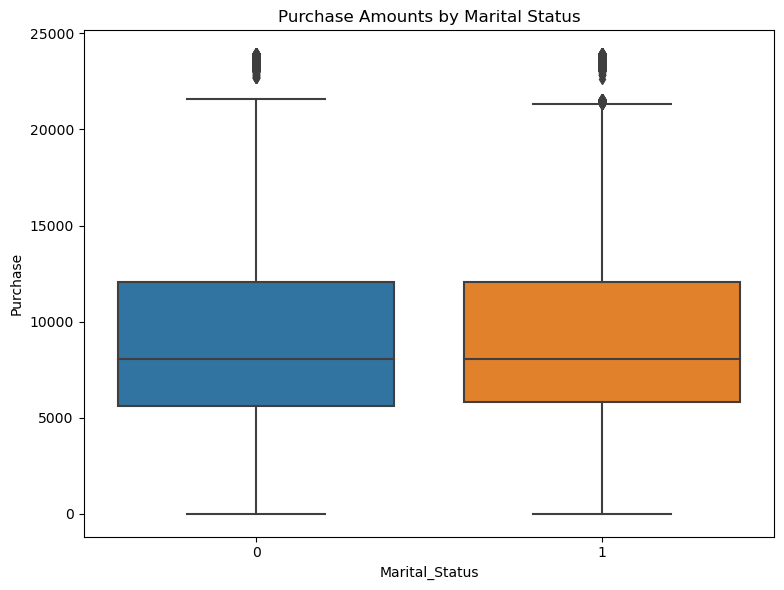

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [74]:
# Grouping by Marital Status and calculating descriptive statistics for purchase amount
marital_purchase_stats = df_wmart.groupby('Marital_Status')['Purchase'].describe()


# Plotting boxplots for purchase amounts by Marital Status
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Marital_Status', y='Purchase', data= df_wmart)
plt.title('Purchase Amounts by Marital Status')
plt.tight_layout()
plt.show()

marital_purchase_stats

Both groups have very similar spending patterns.
Mean Purchase Amount: Approximately 9,265 for both groups.
The distribution of purchase amounts (as shown in the boxplot) does not show much differences between married and unmarried customers.
Marital Status: The lack of significant differences in spending between married and unmarried customers suggests that marital status may not be a strong determinant of purchase amount at Walmart.

# Analyzing purchase behavior by Age group

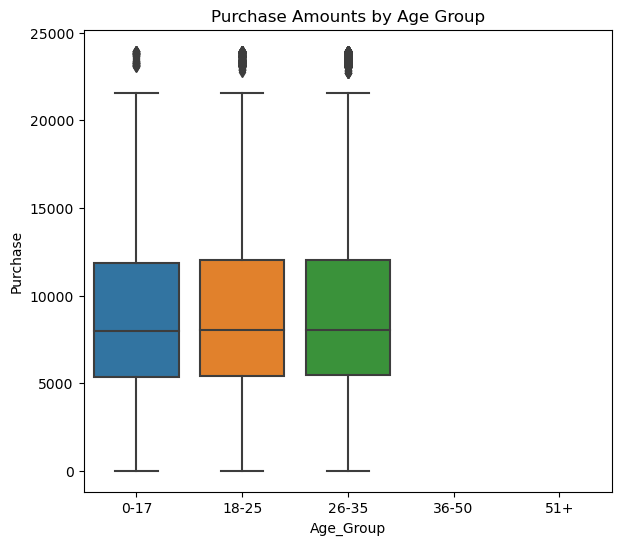

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51+,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Binning the age groups
age_bins = ["0-17", "18-25", "26-35", "36-50", "51+"]
df_wmart['Age_Group'] = pd.Categorical(df_wmart['Age'], categories=age_bins, ordered=True)

# Grouping by Age Group and calculating descriptive statistics for purchase amount
age_purchase_stats = df_wmart.groupby('Age_Group')['Purchase'].describe()

# Plotting boxplots for purchase amounts by Age Group
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='Age_Group', y='Purchase', data=df_wmart)
plt.title('Purchase Amounts by Age Group')
plt.show()

age_purchase_stats

Age Group Analysis: Age-Based Purchase Behavior:

The analysis considered the following age bins: 0-17, 18-25, 26-35, 36-50, 51+ years.
no entries were found for the "36-50" and "51+" age groups in the dataset for these bins.
For the available age groups:

0-17 Years: Mean Purchase Amount is approximately 8,933.
18-25 Years: Mean Purchase Amount is approximately 9,169.
26-35 Years: Mean Purchase Amount is approximately 9,252.

These results show a slight increase in average spending with age up to 35 years.

Age-Based Marketing: The increase in spending with age, up to 35 years, suggests that younger age groups (especially 18-35) could be key target demographics for certain products or promotions.

Questions:
    
1.Are Women spending more money per transaction than Men? 
Why or Why Not?

Findings: Men are spending more per transaction than women. The average purchase amount for male customers (9,437.53) is higher than that for female customers (8,734.57).
Reason: This could be due to various factors including differences in shopping habits, preferences for product categories, or income levels between genders.

2.Confidence Intervals and Distribution of the Mean of the Expenses by Female and Male Customers

Confidence Intervals: For a sample size of 10,000, the 95% confidence interval for average female spending is approximately 8,641.13 to 8,828.00, and for male spending, it is 9,337.72 to 9,537.33.
Distribution: The distribution of mean expenses suggests that male customers on average spend more than female customers, with non-overlapping confidence intervals indicating a statistically significant difference.

3.Are Confidence Intervals of average Male and Female spending overlapping?

Findings: The confidence intervals for average spending of male and female customers do not overlap.
Implications for Walmart: This significant difference in spending patterns can inform gender-targeted marketing strategies, inventory management, and product placement. Walmart could focus on higher-value items in areas frequented by male customers and design promotions appealing to female customers.

4.Results when the same activity is performed for Married vs Unmarried

Findings: There was no significant difference in spending patterns between married and unmarried customers. Both groups have similar average spending amounts.
Implication: Marital status may not be a significant factor in customer spending at Walmart, suggesting that marketing and product strategies need not be heavily differentiated on this basis.

5.Results when the same activity is performed for Age

Findings: The analysis showed a slight increase in average spending with age, at least up to the age of 35.
Implication: Walmart could focus on products and marketing strategies that cater to the preferences of younger adults, particularly those in the 26-35 age group, as they constitute a major portion of the customer base and show increasing spending patterns.

# Final Insights Based on Exploration and Central Limit Theorem (CLT)



Insights from Data Exploration:

Gender-Based Spending:
Men spend more per transaction than women. This insight is crucial for tailoring marketing strategies and product offerings.

Age Group Spending:
There is a noticeable trend of increased spending in the 26-35 age group, suggesting this demographic is a key market for Walmart.

Marital Status:
Spending patterns do not significantly vary between married and unmarried customers, indicating that marital status may not be a primary factor influencing purchase decisions at Walmart.

Insights from Central Limit Theorem (CLT):

Statistical Significance:
The CLT was used to calculate confidence intervals, revealing that the differences in average spending between different demographic groups (like gender and age) are statistically significant.

Population Generalization:
Using the CLT, we can generalize our sample findings to the broader population of Walmart customers with a known level of confidence

# Recommendations:

Focus on Young Adult Customers: Develop marketing campaigns and in-store promotions tailored to the 26-35 age group, as they represent a significant portion of the customer base and show higher spending patterns.

Diverse Product Range: Continue to offer a wide range of products to cater to the diverse spending abilities and needs of Walmart's customer base, as indicated by the wide range of purchase amounts.

Gender-Specific Promotions: Implement gender-specific promotions and discounts, especially targeting female customers, to increase their spending to levels closer to male customers.
    
Customer Engagement Strategies: Engage with customers through surveys and feedback platforms to better understand their needs and preferences, especially focusing on the key demographics identified.
        
Target Marketing Efforts Towards Men: Prioritize high-value products and promotional strategies in sections of the store and online platforms frequented by male customers, as they tend to spend more per transaction.
      
Training for Staff: Train staff to understand these demographic insights, enabling them to offer better customer service and recommendations, enhancing the overall shopping experience.